# Generating Music Using Deep Learning

## Introduction

**<i>"Twelve notes and the octave repeats. It's the same story told over and over, forever. All any artist can offer the world is how they see those twelve notes. That's it."</i>**
<br>
\- Sam Elliott as Bobby - A Star Is Born (2018)

Yes, indeed there are only 12 notes - **A, Bb, B, C, Db, D, Eb, E, F, Gb, G, Ab** - and the cycle repeats.

With such few notes available to musicians, is no wonder we are sometimes stuck in a creative rut, unable to come up with a good melodies.

### Melody
A melody is a rhythmic succession of single tones organized as an aesthetic whole.<sup>1</sup><br>
It is the heart and soul of the song, and the reason why you and I feel patriotic to the chorus of Kit Chan's 'Home', pumped up to the chorus of Bon Jovi's 'It's My Life', and the list goes on.

### Chord Progression
A chord progression is a sequence of chords that form the sonic landscape of a song that forms the base of that song. A chord progression can set the tone and mood of a song, and will affect the melodies played over it.
The introduction of The Cranberries 'Zombie' is an example of a chord progression.

### Rests
A rest is a space in music where no notes or chords are played. Rests are equally as important to melodies and chords, as they provide a dynamic to the song, a classic case of 'silence speaks louder than words'.

<br><br>
**What if we can use AI to help musicians break out of their creative slump?**

## Problem Statement
It can be difficult at times for musicians to come up with melodies and their accompanying chords. This can often lead to undue frustrations and stress on the musician, producer and record labels, as well as incurring monetary costs due to the additional time spent in the recording studio or delays in song releases.<br>
In view of this, I plan to develop and model that can generate melodies and their accompanying chord progressions with a random or manual input.
With this model that is able to generate it's own music, I hope to save costs in the music industry by reducing the time taken to write catchy songs.

### Determining Success
Success will be determined by how musically satisfying the music generated over 100 notes.


## The Model
The model will be constructed using Recurrent Neural Networks (RNN) from the TensorFlow library.<br>

### Model Deliverables
1. LSTM Model using just notes and chords to generate music.
    - This will be my Minimum Viable Product (MVP)
    - Serve as basis for the more advanced models.
    
    
2. LSTM Model using the notes, chords and rests to generate music.
    - This will hopefully generate a more musically pleasing song.
    
    
3. LSTM Model using the notes, chords and rests, as well as Keras Attention modules to generate music.
    - This will hopefully generate music where melodies and chords are more musically coherent.


4. Model which reads a chord progression input and generates melodies.
    - This will be the most ambitious model
    - Still undecided on which model to use, maybe Generative Adversarial Network
    - Will only attempt if time permits


## The Music Data

The data for the model will be songs in MIDI format.

### MIDI
MIDI is short for **M**usical **I**nstrument **D**igital **I**nterface. It’s a protocol that allows computers, musical instruments and other hardware to communicate.<sup>2</sup><br>
Advantages of MIDI include:
- Small file sizes, smaller than even an equivalent 8Khz WAV file 
- Can easily seperate the different instruments
- Many tools that can load and create MIDI, such as MuseScore and GuitarPro
- Easliy read by various Python libraries, such as Music21 and Mido

### The Preliminary Dataset
75 MIDI files from the GIT repo https://github.com/Skuldur/Classical-Piano-Composer/tree/master/midi_songs <sup>3</sup>.<br>
This consist of piano music, mostly from Final Fantasy soundtracks. The advantage is all these files consists of a single instrument, thus making it easier to process the data.<br>
This will serve as the Train Dataset.

## Music21

I will use Music21 to read and process the MIDI files in the dataset. Music21 is a Python-based toolkit for computer-aided musicology.<sup>4</sup>

### Using Music21

In [1]:
# importing the necessary Music21 libraries
from music21 import converter, instrument, stream, note, chord

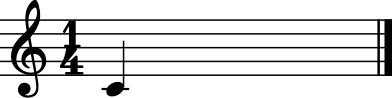

In [2]:
# creating a note
n1 = note.Note('C4')
n1.show()

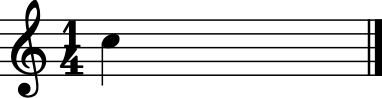

In [3]:
# create another note
n2 = note.Note('C5')
n2.show()

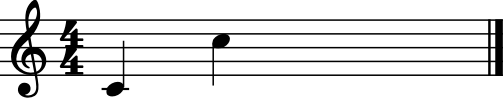

In [4]:
# combining notes
s = stream.Stream()
s.append(n1)
s.append(n2)

s.show()

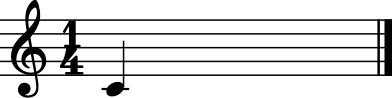

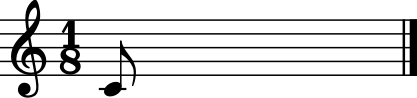

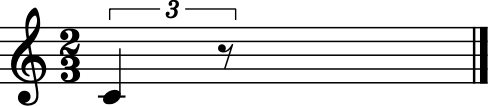

In [5]:
# time signature using quaterlength
# generate different durations for the note n1
n1.quarterLength
n1.show()

n1.quarterLength = .5
n1.show()

n1.quarterLength = 2/3
n1.show()

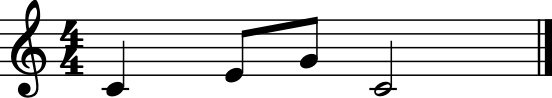

In [6]:
# generateing a melody
n1 = note.Note('C', quarterLength=1)
n2 = note.Note('E', quarterLength=.5)
n3 = note.Note('G', quarterLength=.5)
n4 = note.Note('C', quarterLength=2)

s = stream.Stream()
s.append([n1, n2, n3, n4])

s.show()

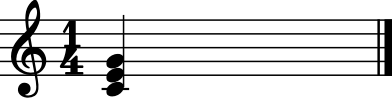

In [7]:
# generate chords
c1 = chord.Chord(['C', 'E', 'G'])
c1.show()

In [8]:
# converting a chord into it's numerical elements
c1.normalOrder

[0, 4, 7]

In [9]:
# saving as midi file
s.write(fmt='midi', fp='../test/my_melody.mid')

'../test/my_melody.mid'

In [10]:
# loading the midi
midi_song = converter.parse('../test/my_melody.mid')

In [11]:
# reading the components if file has instrument parts
for element in instrument.partitionByInstrument(midi_song).parts[0].recurse():
    print(element)


<music21.clef.TrebleClef>
<music21.tempo.MetronomeMark animato Quarter=120.0>
<music21.meter.TimeSignature 4/4>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note G>
<music21.note.Note C>


In [12]:
# reading the components if file is just flat structure
for element in midi_song.flat.notes:
    print(f'{element} {element.quarterLength}') # get time interval using quarterlength

<music21.note.Note C> 1.0
<music21.note.Note E> 0.5
<music21.note.Note G> 0.5
<music21.note.Note C> 2.0


Now that we know how to read the MIDI files, we can read the dataset.

## Train Dataset

As stated above, I got my train dataset from https://github.com/Skuldur/Classical-Piano-Composer.
I have included the LICENSE for the dataset in the main folder:
```
MIT License

Copyright (c) 2019 Sigurður Skúli Sigurgeirsson

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```

In [14]:
import glob

In [37]:
# let's seperate up the sequence by songs.
# 1 song in 1 list

notes_format = []
failed_file_count = 0
for file in glob.glob("../midi_songs/*.mid"):
    
    try:
        midi = converter.parse(file)
        print(f'Parsing {file}') # to keep track of progress
        notes_to_parse = None
        
    except:
        print(f'failed to find time signature for file {file}') # in case file cannot be read
        failed_file_count+=1
    
    notes_to_parse = midi.flat.notes
    
    notes = []
# we are interested in getting the notes, chords and rests
# quarterlength is the duration of each note, chord and rest
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            notes.append(str(element.pitch)+ " " +  str(element.quarterLength)) # add note and duration
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder) + " " +  str(element.quarterLength)) # convert a chord into it's numerical elements
        elif isinstance(element, note.Rest):
            notes.append(str(element.name)  + " " + str(element.quarterLength))
            
    notes_format.append([notes, file])

Parsing ../midi_songs/Ff7-Jenova_Absolute.mid
Parsing ../midi_songs/FF8_Shuffle_or_boogie_pc.mid
Parsing ../midi_songs/ahead_on_our_way_piano.mid
Parsing ../midi_songs/balamb.mid
Parsing ../midi_songs/DOS.mid
Parsing ../midi_songs/FF3_Battle_(Piano).mid
failed to find time signature for file ../midi_songs/Suteki_Da_Ne_(Piano_Version).mid
Parsing ../midi_songs/caitsith.mid
Parsing ../midi_songs/sera_.mid
Parsing ../midi_songs/Oppressed.mid
failed to find time signature for file ../midi_songs/ff4-airship.mid
Parsing ../midi_songs/ff7themep.mid
Parsing ../midi_songs/FFVII_BATTLE.mid
failed to find time signature for file ../midi_songs/electric_de_chocobo.mid
Parsing ../midi_songs/Ff7-One_Winged.mid
Parsing ../midi_songs/Finalfantasy5gilgameshp.mid
Parsing ../midi_songs/Cids.mid
Parsing ../midi_songs/lurk_in_dark.mid
Parsing ../midi_songs/FFX_-_Ending_Theme_(Piano_Version)_-_by_Angel_FF.mid
Parsing ../midi_songs/ff4pclov.mid
Parsing ../midi_songs/AT.mid
failed to find time signature for fi

From the print data above, we can observe that there are some files where Music21 "failed to find time signature for file".

We will look into this matter further.

### failed to find time signature for file
By comparing the files with this issue and the files with no issues in MuseScore (MIDI Reading Software), I am still unable to find the source of the problem.<br>
However, by using the try and except commands, we are able to bypass these problem files.

In [38]:
failed_file_count

13

13 files out of the 75 were unable to be read.<br>
62 files were still read, which is still a sizeable number.<br><br>
Next, we will look at the number of songs which have less than 100 notes. As we will be using a sequence of 100 notes to predict the next (101st) note. A song would not be of any use if it has 100 or less notes.

In [21]:
# get songs length and name for songs that have less than 100 notes
[(len(song[0]), song[1]) for song in notes_format if len(song[0])<=100]

[]

Since there are no songs which have 100 or less notes, we can retain all songs.

### Song length analysis

In [57]:
song_lengths = [len(song[0]) for song in notes_format]

In [63]:
print(f'The average song length is {round(sum(song_lengths)/len(song_lengths),2)} elements.')

The average song length is 677.9 elements.


In [64]:
import matplotlib.pyplot as plt

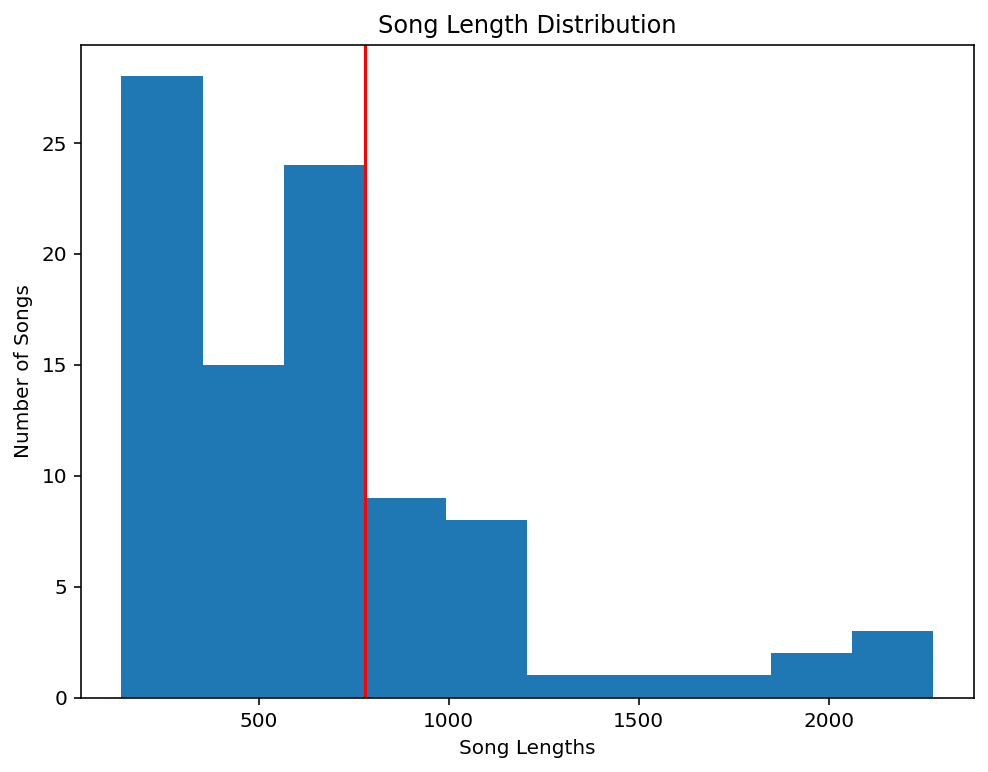

In [77]:
plt.figure(figsize=(8,6))
plt.hist(song_lengths)
plt.xlabel('Song Lengths')
plt.ylabel('Number of Songs')
plt.axvline(x=780, c='red')
plt.title('Song Length Distribution');

From the distribution, we can see that most songs are less than 780 elements in length.

### Seperating the durations from notes and chords
Other than generating music, the following desired outcomes should be achieved by passing the song data through a deep learning model:
- Model should learn some music theory.
    - This can be achieved when the model learns which notes or chords appear in sequence with another, and has little to do with the timing of each note.
- Model should learn the 'beat' of music.
    - This can be achieved when the model learns which durations appear in sequence with another, and has little to do with what notes the time signature is tied to.

In view of this, we can seperate the durations from the notes/chords, and build two seperate models - one for notes/chords, and one for durations.

In [22]:
notes_new_format = []
time_new_format = []
failed_file_count = 0
for file in glob.glob("../midi_songs/*.mid"):
    
    try:
        midi = converter.parse(file)
        print(f'Parsing {file}') # to keep track of progress
        notes_to_parse = None

    except:
        print(f'failed to find time signature for file {file}') # in case file cannot be read
        failed_file_count+=1

    notes_to_parse = midi.flat.notes

    notes = []
    time = []
# we are interested in getting the notes and chords
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            notes.append(str(element.pitch)) # get note
            time.append(str(element.quarterLength)) # get duration
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder)) # get chord
            time.append(str(element.quarterLength)) # get duration
        elif isinstance(element, note.Rest):
            notes.append(str(element.name)) # get rest
            time.append(str(element.quarterLength)) # get duration

    notes_new_format.append(notes)
    time_new_format.append(time)

Parsing ../midi_songs/Ff7-Jenova_Absolute.mid
Parsing ../midi_songs/FF8_Shuffle_or_boogie_pc.mid
Parsing ../midi_songs/ahead_on_our_way_piano.mid
Parsing ../midi_songs/balamb.mid
Parsing ../midi_songs/DOS.mid
Parsing ../midi_songs/FF3_Battle_(Piano).mid
failed to find time signature for file ../midi_songs/Suteki_Da_Ne_(Piano_Version).mid
Parsing ../midi_songs/caitsith.mid
Parsing ../midi_songs/sera_.mid
Parsing ../midi_songs/Oppressed.mid
failed to find time signature for file ../midi_songs/ff4-airship.mid
Parsing ../midi_songs/ff7themep.mid
Parsing ../midi_songs/FFVII_BATTLE.mid
failed to find time signature for file ../midi_songs/electric_de_chocobo.mid
Parsing ../midi_songs/Ff7-One_Winged.mid
Parsing ../midi_songs/Finalfantasy5gilgameshp.mid
Parsing ../midi_songs/Cids.mid
Parsing ../midi_songs/lurk_in_dark.mid
Parsing ../midi_songs/FFX_-_Ending_Theme_(Piano_Version)_-_by_Angel_FF.mid
Parsing ../midi_songs/ff4pclov.mid
Parsing ../midi_songs/AT.mid
failed to find time signature for fi

In [39]:
# should be equal length
print(len(notes_new_format))
print(len(time_new_format))

92
92


### Getting the number of unique notes and unique durations
This is essential as we need to create and note dictionary and time dictionary where each unique element is mapped to an integer. This serves to vectorize the unique elements, similar to vectorizing unique words in a Natural Language Processing problem.

In [42]:
notes = []
time = []
failed_file_count = 0
for file in glob.glob("../midi_songs/*.mid"):

    try:
        midi = converter.parse(file)
        print(f'Parsing {file}') # to keep track of progress
        notes_to_parse = None

    except:
        print(f'failed to find time signature for file {file}') # in case file cannot be read
        failed_file_count+=1

    notes_to_parse = midi.flat.notes

# we are interested in getting the notes and chords
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            notes.append(str(element.pitch))
            time.append(str(element.quarterLength))
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder))
            time.append(str(element.quarterLength))
        elif isinstance(element, note.Rest):
            notes.append(str(element.name))
            time.append(str(element.quarterLength))

Parsing ../midi_songs/Ff7-Jenova_Absolute.mid
Parsing ../midi_songs/FF8_Shuffle_or_boogie_pc.mid
Parsing ../midi_songs/ahead_on_our_way_piano.mid
Parsing ../midi_songs/balamb.mid
Parsing ../midi_songs/DOS.mid
Parsing ../midi_songs/FF3_Battle_(Piano).mid
failed to find time signature for file ../midi_songs/Suteki_Da_Ne_(Piano_Version).mid
Parsing ../midi_songs/caitsith.mid
Parsing ../midi_songs/sera_.mid
Parsing ../midi_songs/Oppressed.mid
failed to find time signature for file ../midi_songs/ff4-airship.mid
Parsing ../midi_songs/ff7themep.mid
Parsing ../midi_songs/FFVII_BATTLE.mid
failed to find time signature for file ../midi_songs/electric_de_chocobo.mid
Parsing ../midi_songs/Ff7-One_Winged.mid
Parsing ../midi_songs/Finalfantasy5gilgameshp.mid
Parsing ../midi_songs/Cids.mid
Parsing ../midi_songs/lurk_in_dark.mid
Parsing ../midi_songs/FFX_-_Ending_Theme_(Piano_Version)_-_by_Angel_FF.mid
Parsing ../midi_songs/ff4pclov.mid
Parsing ../midi_songs/AT.mid
failed to find time signature for fi

In [43]:
# check the lengths of notes and time.
# they should be of equal length
print(len(notes))
print(len(time))

62367
62367


In [44]:
# get unique pitchnames
pitchnames = sorted(set(item for item in notes))

# get unique timenames
timenames = sorted(set(item for item in time))

print(f'{len(pitchnames)} unique elements in pitchnames.')
print(f'{len(timenames)} unique durations in timenames.')

382 unique elements in pitchnames.
173 unique durations in timenames.


### Top notes/chords

In [45]:
import pandas as pd

In [46]:
note_df = pd.DataFrame(notes)
note_df.rename(columns={0:'notes/chords'}, inplace=True)
print(note_df.shape)
note_df.head()

(62367, 1)


,notes/chords
0,F3
1,F3
2,B-4
3,F3
4,G4


In [47]:
note_df['count'] = 1
note_df.head()

,notes/chords,count
0,F3,1
1,F3,1
2,B-4,1
3,F3,1
4,G4,1


In [48]:
note_df.groupby(by='notes/chords').count().sort_values(by='count', ascending=False).head()

,count
notes/chords,
A2,1592
D3,1376
A3,1351
E4,1350
G4,1341


The top 5 notes are **A2, D3, A3, E4,** and **G4**.

### Top durations

In [49]:
time_df = pd.DataFrame(time)
time_df.rename(columns={0:'durations'}, inplace=True)
print(time_df.shape)
time_df.head()

(62367, 1)


,durations
0,0.75
1,0.75
2,0.25
3,0.75
4,0.25


In [50]:
time_df['count'] = 1
time_df.head()

,durations,count
0,0.75,1
1,0.75,1
2,0.25,1
3,0.75,1
4,0.25,1


In [51]:
time_df.groupby(by='durations').count().sort_values(by='count', ascending=False).head()

,count
durations,
0.5,25729
0.25,9640
0.75,7990
1.0,4190
1/3,3541


The most popular durations is **0.5**.<br>
The top 5 durations are **0.5, 0.25, 0.75, 1.0** and **1/3**.

### Add unknown variable

We need to add an **unknown variable** to pitchnames and timenames.<br>
There are many unique notes/chords and durations in music.<br>
In order for the model to generate music from a new dataset of music, we will need to add this **unknown variable**, as there may be notes/chords or durations thatdo not exist in this dataset.

In [52]:
# create function to add unknown variable to pitchnames
def add_unknown(some_names):
    some_names.insert(0,'unkw') # insert unknown variable at the start of the dataset
    return some_names

In [53]:
add_unknown(pitchnames)
add_unknown(timenames)

# check if unknown variable is added.
print(pitchnames[0])
print(timenames[0])

print(f'{len(pitchnames)} unique elements in pitchnames.')
print(f'{len(timenames)} unique durations in timenames.')

unkw
unkw
383 unique elements in pitchnames.
174 unique durations in timenames.


**unknown variable** has been successfully added.

In [54]:
# create a dictionary to map notes/chords and durations to integers - this will help with the modelling later
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
time_to_int = dict((time, number) for number, time in enumerate(timenames))

# check the length of the dictionary to ensure that all values are mapped to integers keys
print(len(note_to_int))
print(len(time_to_int))

383
174


Since the length of note_to_int and time_to_int are the same as pitchnames and timenames respectively, the values were mapped successfully.

In [33]:
# save the notes and note_to_int as pickle files

import pickle

# save the note items

# save notes
with open('../assets_notes_times/notes', 'wb') as filepath:
    pickle.dump(notes, filepath)

# save note_to_int
with open('../assets_notes_times/note_to_int', 'wb') as filepath:
    pickle.dump(note_to_int, filepath)
    
# save song_notes
with open('../assets_notes_times/song_notes', 'wb') as filepath:
    pickle.dump(notes_new_format, filepath)
    
    
# save the duration items

# save durations
with open('../assets_notes_times/time', 'wb') as filepath:
    pickle.dump(time, filepath)

# save time_to_int
with open('../assets_notes_times/time_to_int', 'wb') as filepath:
    pickle.dump(time_to_int, filepath)
    
# save song_times
with open('../assets_notes_times/song_times', 'wb') as filepath:
    pickle.dump(time_new_format, filepath)

## References
1. https://www.merriam-webster.com/dictionary/melody
2. https://blog.landr.com/what-is-midi/
3. https://github.com/Skuldur/Classical-Piano-Composer/tree/master/midi_songs
4. https://web.mit.edu/music21/doc/about/what.html#:~:text=Music21%20is%20a%20Python%2Dbased%20toolkit%20for%20computer%2Daided%20musicology.&text=We%20hope%20that%20with%20the,is%20constantly%20growing%20and%20expanding.